In [5]:
#Import all the necessary modules

import pandas as pd
import numpy as np
import os
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning')

In [8]:
colnames=['IR', 'MR', 'FF', 'CR', 'CO', 'OP', 'Class']
bankruptcy = pd.read_csv('Qualitative_Bankruptcy.data.txt',names=colnames, header=None)
bankruptcy.head()

,IR,MR,FF,CR,CO,OP,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [9]:
# Feature set is X
feature_set=bankruptcy.drop('Class',axis=1)
print(feature_set.columns)
# y
target_set=bankruptcy[['Class']].copy()
target_set.columns = ['Class']
print(target_set.columns)

target_names = ['No Bankruptcy', 'Bankruptcy']

Index(['IR', 'MR', 'FF', 'CR', 'CO', 'OP'], dtype='object')
Index(['Class'], dtype='object')


In [10]:
# Label encode features 
# Create a label (category) encoder object
feature_set_encoded = pd.get_dummies(feature_set)
# using 1-hot encoder
print(feature_set_encoded.head(4))
# encoded values are - A = 0, N = 1, P = 2

target_set_encoded = target_set.apply(preprocessing.LabelEncoder().fit_transform)
print(target_set_encoded.head(4))
print(target_set_encoded.tail(2))
# class encoded values are - NB = 0, B = 1

   IR_A  IR_N  IR_P  MR_A  MR_N  MR_P  ...  CO_A  CO_N  CO_P  OP_A  OP_N  OP_P
0     0     0     1     0     0     1  ...     1     0     0     0     0     1
1     0     1     0     0     1     0  ...     1     0     0     0     1     0
2     1     0     0     1     0     0  ...     1     0     0     1     0     0
3     0     0     1     0     0     1  ...     0     0     1     0     0     1

[4 rows x 18 columns]
   Class
0      1
1      1
2      1
3      1
     Class
248      0
249      0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(feature_set_encoded, target_set_encoded, test_size=0.2,random_state=100)

In [12]:
print(X_train.shape, X_test.shape)

# Apply PCA on train data of features and Explore PCA

pca = PCA()
pca.fit(X_train)

postPCA = pd.DataFrame(pca.components_, columns=feature_set_encoded.columns)
postPCA

(200, 18) (50, 18)


,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,CR_A,CR_N,CR_P,CO_A,CO_N,CO_P,OP_A,OP_N,OP_P
0,-0.124366,0.191299,-0.066933,-0.100527,0.272329,-0.171802,-0.240572,0.406671,-0.166099,-0.153176,0.379817,-0.226642,-0.164735,0.441654,-0.276919,-0.026640,0.186225,-0.159585
1,0.482032,-0.317499,-0.164532,0.409329,-0.319006,-0.090322,-0.146256,0.229618,-0.083362,-0.173249,0.150446,0.022803,-0.138012,0.105438,0.032575,0.328213,-0.296867,-0.031346
2,-0.057078,-0.109118,0.166195,0.227132,-0.042846,-0.184286,-0.125873,-0.124718,0.250591,0.269077,0.008020,-0.277097,-0.342315,-0.051430,0.393745,0.071545,0.378864,-0.450409
3,-0.233825,-0.357826,0.591651,0.050154,-0.277902,0.227748,-0.111645,0.084918,0.026727,-0.204296,0.253690,-0.049394,-0.102549,0.068470,0.034079,-0.319083,0.022413,0.296670
4,0.024566,0.135567,-0.160133,-0.016741,-0.016482,0.033223,-0.095753,-0.035058,0.130811,-0.599476,0.012238,0.587238,-0.178075,-0.054629,0.232704,-0.144720,0.297724,-0.153004
5,0.318326,-0.035110,-0.283216,-0.073947,-0.395735,0.469682,0.078120,0.036062,-0.114182,0.177093,-0.043346,-0.133747,0.060867,0.122360,-0.183227,-0.310520,0.443441,-0.132920
6,0.004086,0.209849,-0.213935,-0.217425,-0.036047,0.253472,-0.488109,0.180786,0.307323,0.219054,-0.180746,-0.038308,-0.338899,0.089342,0.249557,-0.062132,-0.250848,0.312981
7,0.161193,-0.284799,0.123606,-0.212417,0.139959,0.072457,-0.464071,0.001188,0.462883,-0.045166,-0.000224,0.045390,0.432055,-0.124447,-0.307607,0.150016,0.072311,-0.222326
8,0.360309,-0.455965,0.095656,-0.489610,0.427574,0.062036,0.159894,0.096393,-0.256288,0.023083,-0.057322,0.034239,-0.240604,-0.009244,0.249848,-0.007993,0.022837,-0.014844
9,-0.305384,0.124608,0.180776,-0.232454,-0.225691,0.458146,0.049391,0.159149,-0.208540,-0.038377,-0.039551,0.077927,-0.039987,-0.018807,0.058794,0.531071,-0.133562,-0.397509


In [13]:
pca.components_

array([[-1.24365511e-01,  1.91298989e-01, -6.69334780e-02,
        -1.00527283e-01,  2.72329063e-01, -1.71801780e-01,
        -2.40572372e-01,  4.06671052e-01, -1.66098680e-01,
        -1.53175843e-01,  3.79817454e-01, -2.26641611e-01,
        -1.64735386e-01,  4.41654266e-01, -2.76918880e-01,
        -2.66402819e-02,  1.86225491e-01, -1.59585209e-01],
       [ 4.82031895e-01, -3.17499493e-01, -1.64532402e-01,
         4.09328544e-01, -3.19006357e-01, -9.03221867e-02,
        -1.46255831e-01,  2.29618179e-01, -8.33623479e-02,
        -1.73248781e-01,  1.50446118e-01,  2.28026632e-02,
        -1.38012158e-01,  1.05437652e-01,  3.25745061e-02,
         3.28212889e-01, -2.96866767e-01, -3.13461215e-02],
       [-5.70779187e-02, -1.09117554e-01,  1.66195473e-01,
         2.27131745e-01, -4.28455061e-02, -1.84286239e-01,
        -1.25872804e-01, -1.24717990e-01,  2.50590793e-01,
         2.69076652e-01,  8.02048552e-03, -2.77097137e-01,
        -3.42314585e-01, -5.14303467e-02,  3.93744932e

In [14]:
print('Explained Variance - ',pca.explained_variance_)
print('Explained Variance Ratio - ',pca.explained_variance_ratio_)

Explained Variance -  [1.03150708e+00 4.85893506e-01 4.00870591e-01 3.77225154e-01
 3.09253922e-01 2.94176958e-01 2.80992324e-01 2.31637147e-01
 1.89151200e-01 1.74411480e-01 1.02948109e-01 4.99224804e-02
 8.93378375e-32 5.89988744e-32 2.43659855e-32 2.13920219e-32
 1.12085332e-32 3.71730929e-33]
Explained Variance Ratio -  [2.62604307e-01 1.23700293e-01 1.02054892e-01 9.60351627e-02
 7.87308333e-02 7.48924926e-02 7.15359070e-02 5.89709112e-02
 4.81547058e-02 4.44022214e-02 2.62088525e-02 1.27094216e-02
 2.27439069e-32 1.50201185e-32 6.20316900e-33 5.44604802e-33
 2.85350353e-33 9.46364258e-34]


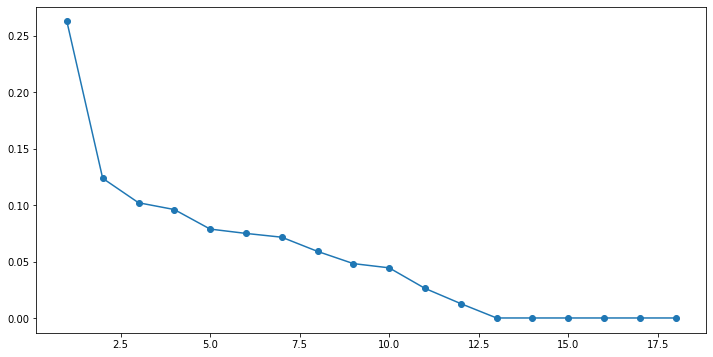

In [15]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( range(1,19),pca.explained_variance_ratio_, marker = "o" )

# from the below elbow graph looks like we will be using 12 as optimal PCA component our of 18

In [16]:
pca = PCA(n_components=12)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_pca.shape

(200, 12)

In [17]:
X_train_pca

array([[-0.47542827, -0.31702069,  1.17245846, ..., -0.78291451,
        -0.17224599,  0.09622277],
       [ 1.6645724 , -0.4070135 ,  0.0388786 , ..., -0.06400914,
        -0.1295375 ,  0.14274985],
       [ 1.3489079 ,  0.39251788,  0.09091823, ..., -0.49400113,
        -0.14444193,  0.02821719],
       ...,
       [-0.21808285,  0.07773044,  1.29040032, ...,  0.06417065,
         1.06728893,  0.55717797],
       [-1.06115039,  1.03639387,  1.1351166 , ..., -0.12504458,
        -0.22580627, -0.07976606],
       [-1.24369375, -0.50680887, -1.23367942, ...,  0.39858864,
         0.07148886, -0.21014647]])

In [18]:
# KMeans on X_reduced
c_errors = []
c_range = range( 1, 11 ) 
for i in c_range:
  cluster = KMeans( i,n_init = 10, random_state=3)
  cluster.fit(X_train_pca)
  labels = cluster.labels_
  centroids = cluster.cluster_centers_
  c_errors.append( cluster.inertia_ )


clusters_df = pd.DataFrame( { "no_clusters":c_range, "c_errors": c_errors } )
clusters_df

,no_clusters,c_errors
0,1,781.670000
1,2,599.028736
2,3,537.862010
3,4,489.604167
4,5,455.000869
5,6,420.390631
6,7,403.019244
7,8,383.670580
8,9,369.426168
9,10,354.516544


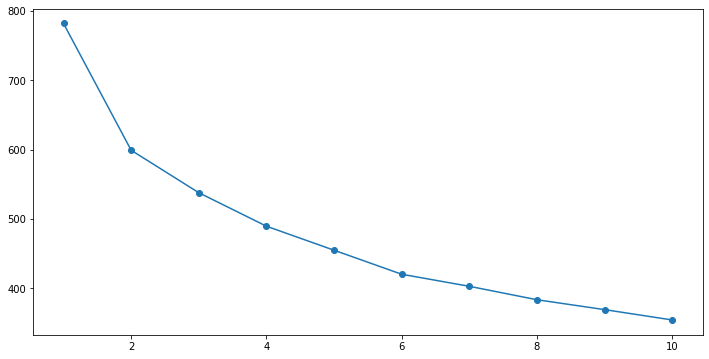

In [19]:
# Optimal K by elbow of scree plot
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.no_clusters, clusters_df.c_errors, marker = "o" )

In [20]:
# clustering the data (X_reduced) using no_of_cluster = 3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)
kmeans.fit(X_train_pca)

df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['cluster']), index=X_train.index)
df_labels

,cluster
42,2
239,1
189,1
145,1
48,0
...,...
87,2
103,0
67,2
24,0


In [21]:
# now join with x-train df
X_train_clustered = X_train.join(df_labels)
X_train_clustered.head(20)

# I was not clear if the cluster feature has to be added in x_train_pca - which is earmaked to be passed to SVC
# though it does not seem right to do that hence as a default added the cluster info in main data set of X_train
# same will be done for X_test as well

,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,CR_A,CR_N,CR_P,CO_A,CO_N,CO_P,OP_A,OP_N,OP_P,cluster
42,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,2
239,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1
189,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1
145,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1
48,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0
99,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,2
23,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0
123,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,2
55,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
22,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0


In [22]:
# PCA on test data
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(50, 12)

In [23]:
kmeans.fit(X_test_pca)
df_test_labels = pd.DataFrame(kmeans.labels_ , columns = list(['cluster']), index=X_test.index)

In [24]:
# now join with feature_set_encoded df
X_test_clustered = X_test.join(df_test_labels)
X_test_clustered

,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,CR_A,CR_N,CR_P,CO_A,CO_N,CO_P,OP_A,OP_N,OP_P,cluster
65,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1
59,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1
195,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,2
112,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1
207,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,2
169,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,2
152,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,2
204,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,2
215,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
173,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,2


In [25]:
# Now we have X_train_pca and x_test_pca as final data sets
# ready to be passed to SVC
svc_model = svm.SVC(C=5., gamma=0.001)
svc_model.fit(X_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
prediction = svc_model.predict(X_test_pca)

In [27]:
# Accuracy on training and test
print(svc_model.score(X_train_pca, y_train))
print(svc_model.score(X_test_pca, y_test))

1.0
0.96


In [28]:
print('Classification Report ')
print(classification_report(y_test, prediction))

confusionmatrix = pd.DataFrame(confusion_matrix(y_test, prediction).T, index=target_names, columns=target_names)
confusionmatrix.index.name = 'Predicted'
confusionmatrix.columns.name = 'Actual'
confusionmatrix

Classification Report 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.96      0.96      0.96        27

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Actual,No Bankruptcy,Bankruptcy
Predicted,,
No Bankruptcy,22,1
Bankruptcy,1,26
